In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_data = np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data)+noise

In [4]:
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

In [5]:
# ANN Structure
#input layer
W1 = tf.Variable(tf.random.normal([1,10]))
B1 = tf.Variable(tf.zeros([1,10]))
O1 = tf.matmul(x,W1)+B1
L1 = tf.nn.tanh(O1)

#Output layer
W2 = tf.Variable(tf.random.normal([10,1]))
B2 = tf.Variable(tf.zeros([1,1]))
O2 = tf.matmul(L1,W2)+B2

In [6]:
loss = tf.reduce_mean(tf.square(y-O2))
optimizer = tf.train.GradientDescentOptimizer(0.2)
train = optimizer.minimize(loss)

In [7]:
init = tf.global_variables_initializer()

In [8]:
with  tf.compat.v1.Session() as sess:
    sess.run(init)
    for step in range(2000):
        sess.run(train,feed_dict = {x:x_data,y:y_data})
    p = sess.run(O2,feed_dict={x:x_data})

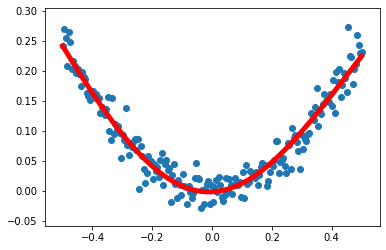

In [9]:
plt.figure()
plt.scatter(x_data,y_data)
plt.plot(x_data,p,'r-',lw = 5)
plt.show()

在建立模型时候注意是先预设输入输出变量，包括数据类型，以及size（见cell 6），然后训练的时候在赋予具体的值

变量初始化：
w = tf.Variable(tf.truncate_normal([784,2000],stddev = 0.1)) # 正态分布的截断分布
b = tf.Variable(tf.zeros([2000]) + 0.1)